In [1]:
#export
"""A quick and dirty tiny module emulating the `p5js <https://p5js.org/>`_
environment. I made this because I have used Processing extensively in
the past, and would like a simple interface to draw stuff. Processing
doesn't really exist on Python (yes, I know of Processing's python mode,
but it's Jython, not pure python!), so I made this based upon the
`drawSvg <https://github.com/cduck/drawSvg>`_ library. Download that
before using this module. Example::

    from k1lib.imports import *

    p5.newSketch(200, 200); background(150)
    p5.rect(0, 0, 60, 60)
    with p5.context(): # all style changes here will be reverted on exiting the context
        p5.fill(255, 0, 0)
        p5.rect(0, 0, 60, 50)
    p5.rect(0, 0, 30, 30)
    p5.fill(255, 180); p5.ellipse(60, 50, 20)
    p5.textSize(12); p5.text("abc", 30, 30)
    with p5.context():
        p5.fill(0, 0, 255); p5.noStroke(); p5.textSize(20)
        p5.text("def", 60, 60)
    p5.img() # get PIL image

Result:

.. image:: images/p5.png"""
import k1lib
import k1lib.cli as cli
drawSvg = k1lib.dep("drawSvg")
__all__ = ["color", "newSketch", "fill", "noFill", "stroke", "noStroke", "ellipse", "rect", "textSize", "text", "background", "img"]

In [2]:
#export
def color(r, g=None, b=None, alpha=255):
    """Get hex representation of a color.
Example::

    p5.color(255, 0, 0) # returns "#ff0000ff", red
    p5.color(255, 0, 0, 100) # returns "#ff000064", transparent red
    p5.color(255, 100) # returns "#ffffff64", transparent white"""
    if g is None and b is None: g = r; b = r
    if g is not None and b is None: alpha = g; g = r; b = r
    return f"#{r:02x}{g:02x}{b:02x}{alpha:02x}"

In [3]:
assert color(255, 0, 0) == "#ff0000ff"
assert color(255, 0, 0, 100) == "#ff000064"
assert color(255, 100) == "#ffffff64"

In [4]:
#export
c = k1lib.Settings();
context = c.context
def _alpha():
    a = int(c.fill[-2:], 16) if c.fill else 255
    b = int(c.stroke[-2:], 16) if c.stroke else 255
    return min(a, b)
def _cs(): return {"fill": c.fill, "stroke": c.stroke, "opacity": _alpha()/255} # colors shorthand
def newSketch(w, h):
    """Creates a new sketch with specified height and width"""
    c.d = drawSvg.Drawing(w, h); c.w = w; c.h = h
    c.stroke = color(0); c.fill = color(255); c.fontSize = 12
def fill(*args):
    """Sets fill color"""
    c.fill = color(*args)
def noFill():
    """Turns off fill color"""
    c.fill = None
def stroke(*args):
    """Sets stroke color"""
    c.stroke = color(*args)
def noStroke():
    """Turns off stroke color"""
    c.stroke = None
def ellipse(x, y, r):
    """Draws a circle at a particular location. Can't truly draw ellipses cause idk how"""
    c.d.append(drawSvg.Circle(x, c.h-y, r, **_cs()))
def rect(x, y, w, h, r=0):
    """Draws a rectangle.

:param r: border radius"""
    if r == 0: c.d.append(drawSvg.Rectangle(x, c.h-y, w, -h, **_cs()))
    else:
        c.d.append(drawSvg.Path(**_cs())
           .arc(x+r, c.h-(y+r), r, 90, 180)
           .arc(x+r, c.h-(y+h-r), r, 180, 270, includeL=True)
           .arc(x+w-r, c.h-(y+h-r), r, 270, 0, includeL=True)
           .arc(x+w-r, c.h-(y+r), r, 0, 90, includeL=True).L(x+r, c.h-y))
def textSize(s):
    """Sets the text size"""
    c.fontSize = s
def text(s, x, y):
    """Draws text at a specific location"""
    c.d.append(drawSvg.Text(s, c.fontSize, x, c.h-y, **_cs()))
def background(*args):
    """Changes the background color"""
    with c.context(stroke=color(*args), fill=color(*args)): rect(0, c.h-0, c.w, -c.h)
def img():
    """Returns a PIL image of the sketch"""
    return c.d.rasterize().pngData | cli.toImg()
def svg() -> str:
    """Returns svg string of the sketch"""
    return c.d.asSvg()

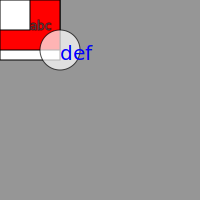

In [8]:
newSketch(200, 200); background(150)
rect(0, 0, 60, 60)
with context(): # all style changes here will be reverted on exiting the context
    fill(255, 0, 0)
    rect(0, 0, 60, 50)
rect(0, 0, 30, 30)
fill(255, 180); ellipse(60, 50, 20)
textSize(12); text("abc", 30, 30)
with context():
    fill(0, 0, 255); noStroke(); textSize(20)
    text("def", 60, 60)
im = img(); im | cli.toBytes() | cli.file("../docs/images/p5.png"); im

In [9]:
!../export.py p5

Current dir: /home/kelvin/repos/labs/k1lib, /home/kelvin/repos/labs/k1lib/k1lib/../export.py
rm: cannot remove '__pycache__': No such file or directory
Found existing installation: k1lib 1.2
Uninstalling k1lib-1.2:
  Successfully uninstalled k1lib-1.2
running install
/home/kelvin/anaconda3/envs/torch/lib/python3.9/site-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/home/kelvin/anaconda3/envs/torch/lib/python3.9/site-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
creating k1lib.egg-info
writing k1lib.egg-info/PKG-INFO
writing dependency_links to k1lib.egg-info/dependency_links.txt
writing requirements to k1lib.egg-info/requires.txt
writing top-level names to k1lib.egg-info/top_level.txt
writin